In [3]:
import numpy as np
import matplotlib.pylab as plt
import random
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split
from torch.autograd import Variable
from torch.optim import lr_scheduler
from fastai.basics import *

from fastai.vision.all import *
import PIL
import os
from functools import reduce

In [4]:
torch.cuda.is_available()

True

In [5]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [113]:
dft_Signal = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData/D4_signal_1700.csv',sep=',')
dft_Diboson = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData/WW_plus_jets.csv', sep=',')
dft_W_plus_jets = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData/W_plus_jets.csv', sep=',')
dft_Z_plus_jets = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData/Z_plus_jets.csv', sep=',')
dft_ttbar = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData/ttbar.csv', sep=',')

In [103]:
ttbar_NNLO = 988.57
ttbar_LO = 80.75
ttbar_new_weight = (dft_ttbar['weight']*ttbar_NNLO)/ttbar_LO
xsec_NNLO_ttbar = (ttbar_new_weight.sum())

W_NNLO = 1.95e5
W_LO = 43247.301481
W_new_weight = (dft_W_plus_jets['weight']*W_NNLO)/W_LO
xsec_NNLO_W = (W_new_weight.sum())

Z_NNLO = 6.33e4
Z_LO = 4128
Z_new_weight = (dft_Z_plus_jets['weight']*Z_NNLO)/Z_LO
xsec_NNLO_Z = (Z_new_weight.sum())

Diboson_NNLO = 124.31 ## WW+jets
Diboson_LO = 17.63
Diboson_new_weight = (dft_Diboson['weight']*Diboson_NNLO)/Diboson_LO
xsec_NNLO_Diboson = (Diboson_new_weight.sum())

x_sec_signal = sum(dft_Signal['weight'])
x_sec_Diboson = sum(dft_Diboson['weight'])
x_sec_W_plus_jets = sum(dft_W_plus_jets['weight'])
x_sec_Z_plus_jets = sum(dft_Z_plus_jets['weight'])
x_sec_ttbar = sum(dft_ttbar['weight'])

print('########## Cross sections in picobarn ##########')
print('cross section D4:', x_sec_signal)
print('cross section Diboson:', xsec_NNLO_Diboson)
print('cross section W plus jets:', xsec_NNLO_W)
print('cross section Z plus jets:', xsec_NNLO_Z)
print('cross section ttbar:', xsec_NNLO_ttbar)
print('################################################')
print('cross section Diboson (LO):', x_sec_Diboson)
print('cross section W plus jets (LO):', x_sec_W_plus_jets)
print('cross section Z plus jets (LO):', x_sec_Z_plus_jets)
print('cross section ttbar (LO):', x_sec_ttbar)

########## Cross sections in picobarn ##########
cross section D4: 2.2574733795310775e-06
cross section Diboson: 7.720473226175799
cross section W plus jets: 345.54038414669117
cross section Z plus jets: 5.700842231284646
cross section ttbar: 183.2741596582192
################################################
cross section Diboson (LO): 1.0949396104697184
cross section W plus jets (LO): 76.63430342078209
cross section Z plus jets (LO): 0.3717705644667144
cross section ttbar (LO): 14.970501221366119


In [ ]:
#The MT_W_jets is the same as MJ3J4. Also remove MT_W_jets
#dft['MT_W_jets'] == dft['MJ3J4']
for i in [dft_Signal, dft_Diboson, dft_W_plus_jets, dft_Z_plus_jets, dft_ttbar]:
    i.drop(['weight'], axis=1, inplace=True)
    i.drop(['MT_W_jets'], axis=1, inplace=True)

In [ ]:
path_img = Path('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Images_Abstract')

In [ ]:
signal_D4_imgs = path_img/'D4_signal/'
Diboson_imgs = path_img/'WW_plus_jets/'
W_plus_jets_imgs = path_img/'W_plus_jets/'
Z_plus_jets_imgs = path_img/'Z_plus_jets/'
ttbar_imgs = path_img/'ttbar/'

In [ ]:
dft_Signal['img Path'] = None
dft_Diboson['img Path'] = None
dft_W_plus_jets['img Path'] = None
dft_Z_plus_jets['img Path'] = None
dft_ttbar['img Path'] = None

In [ ]:
for img in signal_D4_imgs.ls():
    idx = int(img.name.split('.')[0])
    dft_Signal.loc[dft_Signal['event id'] == idx, 'img Path'] = img.absolute()

In [ ]:
for img in Diboson_imgs.ls():
    idx = int(img.name.split('.')[0])
    dft_Diboson.loc[dft_Diboson['event id'] == idx, 'img Path'] = img.absolute()

In [ ]:
for img in W_plus_jets_imgs.ls():
    idx = int(img.name.split('.')[0])
    dft_W_plus_jets.loc[dft_W_plus_jets['event id'] == idx, 'img Path'] = img.absolute()

In [ ]:
for img in Z_plus_jets_imgs.ls():
    idx = int(img.name.split('.')[0])
    dft_Z_plus_jets.loc[dft_Z_plus_jets['event id'] == idx, 'img Path'] = img.absolute()

In [ ]:
for img in ttbar_imgs.ls():
    idx = int(img.name.split('.')[0])
    dft_ttbar.loc[dft_ttbar['event id'] == idx, 'img Path'] = img.absolute()

In [9]:
dft_Signal.to_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/D4_signal_Images_1200.csv' ,sep=',', index=False)
dft_Diboson.to_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/WW_plus_jets_Images.csv' ,sep=',', index=False)
dft_W_plus_jets.to_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/W_plus_jets_Images.csv' ,sep=',', index=False)
dft_Z_plus_jets.to_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/Z_plus_jets_Images.csv' ,sep=',', index=False)
dft_ttbar.to_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/ttbar_Images.csv' ,sep=',', index=False)

In [10]:
df1 = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/D4_signal_Images.csv',sep=',')
df2 = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/WW_plus_jets_Images.csv',sep=',')
df3 = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/W_plus_jets_Images.csv',sep=',')
df4 = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/Z_plus_jets_Images.csv',sep=',')
df5 = pd.read_csv('/home/felipe/JoaoPino/vlq_joao_StrongProduction/TabularData plus Images/ttbar_Images.csv',sep=',')

In [11]:
dft = pd.concat([df1,df2,df3,df4,df5])

In [12]:
del df1, df2, df3, df4, df5

In [13]:
dft.reset_index(drop=True, inplace=True)

In [14]:
dft.keys()

Index(['event id', 'pT_lepton', 'eta_lepton', 'phi_lepton', 'Energy_lepton',
       'met', 'pT_jet1', 'eta_jet1', 'phi_jet1', 'Energy_jet1', 'pT_jet2',
       'eta_jet2', 'phi_jet2', 'Energy_jet2', 'pT_jet3', 'eta_jet3',
       'phi_jet3', 'Energy_jet3', 'pT_jet4', 'eta_jet4', 'phi_jet4',
       'Energy_jet4', 'MT_W', 'MD', 'MDanti', 'MD1', 'MD2', 'MJ1J2', 'MJ1J3',
       'MJ1J4', 'MJ2J3', 'MJ2J4', 'MJ3J4', 'DR_j1lepton', 'DR_j2lepton',
       'DR_j3lepton', 'DR_j4lepton', 'DR_j1j2', 'DR_j1j3', 'DR_j1j4',
       'DR_j2j3', 'DR_j2j4', 'DR_j3j4', 'DPhi_j1lepton', 'DPhi_j2lepton',
       'DPhi_j3lepton', 'DPhi_j4lepton', 'DPhi_j1j2', 'DPhi_j1j3', 'DPhi_j1j4',
       'DPhi_j2j3', 'DPhi_j2j4', 'DPhi_j3j4', 'cos_lepton_MET',
       'cos_lepton_jet1', 'cos_lepton_jet2', 'cos_lepton_jet3',
       'cos_lepton_jet4', 'cos_jet1_jet2', 'cos_jet1_jet3', 'cos_jet1_jet4',
       'cos_jet2_jet3', 'cos_jet2_jet4', 'cos_jet3_jet4', 'img Path', 'weight',
       'MT_W_jets'],
      dtype='object')

In [15]:
dft = scaleColumns(dft, ['pT_lepton', 'eta_lepton', 'phi_lepton', 'Energy_lepton',
                           'met', 'pT_jet1', 'eta_jet1', 'phi_jet1', 'Energy_jet1', 'pT_jet2',
                           'eta_jet2', 'phi_jet2', 'Energy_jet2', 'pT_jet3', 'eta_jet3',
                           'phi_jet3', 'Energy_jet3', 'pT_jet4', 'eta_jet4', 'phi_jet4',
                           'Energy_jet4', 'MT_W', 'MD', 'MDanti', 'MD1', 'MD2', 'MJ1J2', 'MJ1J3',
                           'MJ1J4', 'MJ2J3', 'MJ2J4', 'MJ3J4', 'DR_j1lepton', 'DR_j2lepton',
                           'DR_j3lepton', 'DR_j4lepton', 'DR_j1j2', 'DR_j1j3', 'DR_j1j4',
                           'DR_j2j3', 'DR_j2j4', 'DR_j3j4', 'DPhi_j1lepton', 'DPhi_j2lepton',
                           'DPhi_j3lepton', 'DPhi_j4lepton', 'DPhi_j1j2', 'DPhi_j1j3', 'DPhi_j1j4',
                           'DPhi_j2j3', 'DPhi_j2j4', 'DPhi_j3j4', 'cos_lepton_MET',
                           'cos_lepton_jet1', 'cos_lepton_jet2', 'cos_lepton_jet3',
                           'cos_lepton_jet4', 'cos_jet1_jet2', 'cos_jet1_jet3', 'cos_jet1_jet4',
                           'cos_jet2_jet3', 'cos_jet2_jet4', 'cos_jet3_jet4']) 

In [16]:
Abstract_path = Path('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Images_Abstract/')

In [17]:
def open_image(fname, size=224):
    img = PIL.Image.open(fname).convert('RGB')
    img = img.resize((size, size))
    t = torch.Tensor(np.array(img))
    return 2.*(t.permute(2,0,1).float()/255.0) - 1.

In [18]:
open_image(get_image_files(Abstract_path)[0]).min()

tensor(-1.)

In [19]:
files = get_image_files(Abstract_path)

In [20]:
files[0].parent.name

'D4_signal'

In [21]:
class ImageDistroDataset(torch.utils.data.Dataset):
    def __init__(self, files, dataframe):
        self.files, self.dataframe = files, dataframe
        
    def __getitem__(self, i):
        file = self.files[i]
        img1 = open_image(file)
        parent = file.parent.name
        if parent == 'D4_signal':
            y = torch.FloatTensor([1.,0.,0.,0.,0.])
        elif parent == 'WW_plus_jets':
            y = torch.FloatTensor([0.,1.,0.,0.,0.])
        elif parent == 'W_plus_jets':
            y = torch.FloatTensor([0.,0.,1.,0.,0.])
        elif parent == 'Z_plus_jets':
            y = torch.FloatTensor([0.,0.,0.,1.,0.])
        elif parent == 'ttbar':
            y = torch.FloatTensor([0.,0.,0.,0.,1.]) 
        
        kinematics = self.dataframe.loc[self.dataframe['img Path'] == str(file.absolute()), ['pT_lepton', 'eta_lepton', 'phi_lepton', 'Energy_lepton',
                           'met', 'pT_jet1', 'eta_jet1', 'phi_jet1', 'Energy_jet1', 'pT_jet2',
                           'eta_jet2', 'phi_jet2', 'Energy_jet2', 'pT_jet3', 'eta_jet3',
                           'phi_jet3', 'Energy_jet3', 'pT_jet4', 'eta_jet4', 'phi_jet4',
                           'Energy_jet4', 'MT_W', 'MD', 'MDanti', 'MD1', 'MD2', 'MJ1J2', 'MJ1J3',
                           'MJ1J4', 'MJ2J3', 'MJ2J4', 'MJ3J4', 'DR_j1lepton', 'DR_j2lepton',
                           'DR_j3lepton', 'DR_j4lepton', 'DR_j1j2', 'DR_j1j3', 'DR_j1j4',
                           'DR_j2j3', 'DR_j2j4', 'DR_j3j4', 'DPhi_j1lepton', 'DPhi_j2lepton',
                           'DPhi_j3lepton', 'DPhi_j4lepton', 'DPhi_j1j2', 'DPhi_j1j3', 'DPhi_j1j4',
                           'DPhi_j2j3', 'DPhi_j2j4', 'DPhi_j3j4', 'cos_lepton_MET',
                           'cos_lepton_jet1', 'cos_lepton_jet2', 'cos_lepton_jet3',
                           'cos_lepton_jet4', 'cos_jet1_jet2', 'cos_jet1_jet3', 'cos_jet1_jet4',
                           'cos_jet2_jet3', 'cos_jet2_jet4', 'cos_jet3_jet4']].values
        
        kinematics = torch.FloatTensor(kinematics)
        return (img1, kinematics, y)
    
    def __len__(self): return len(self.files)

In [22]:
files = get_image_files(Abstract_path)

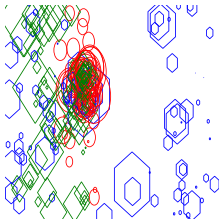

In [23]:
PIL.Image.open(files[0])

In [24]:
idxs = np.random.permutation(range(len(files)))
cut = int(0.8 * len(files))
train_files = files[idxs[:cut]]
valid_files = files[idxs[cut:]]

In [25]:
train_ds = ImageDistroDataset(train_files,dft)
valid_ds = ImageDistroDataset(valid_files,dft)

In [26]:
#bs=256
bs=256
dls = DataLoaders.from_dsets(train_ds, valid_ds,bs=bs)

In [27]:
dls = dls.cuda()

In [28]:
class MixModel(nn.Module):
    def __init__(self):
        super(MixModel, self).__init__()
        self.vision_model = models.resnet34(num_classes=5)
        self.kinematic_model = nn.Sequential()
        #Input Layer
        #63 is the number of observables
        linear1 = nn.Linear(63, 1024, bias=True)
        nn.init.normal_(linear1.weight)
        self.kinematic_model.add_module("Linear 1", linear1)
        self.kinematic_model.add_module("Activation 1", nn.Sigmoid())
        #Layer 1
        linear1 = nn.Linear(1024, 1024, bias=True)
        nn.init.normal_(linear1.weight)
        self.kinematic_model.add_module("Linear 2", linear1)
        self.kinematic_model.add_module("Activation 2", nn.Sigmoid())
        #Layer 2
        linear1 = nn.Linear(1024, 1024, bias=True)
        nn.init.normal_(linear1.weight)
        self.kinematic_model.add_module("Linear 3", linear1)
        self.kinematic_model.add_module("Activation 3", nn.Sigmoid())
        #Output Layer
        #5 is the number of classes (1 signal plus 4 backgrounds)
        linear1 = nn.Linear(1024, 5, bias=True)
        nn.init.xavier_uniform_(linear1.weight)
        self.kinematic_model.add_module("Linear 4", linear1)
        self.kinematic_model.add_module("Activation 4", nn.Sigmoid())   
        # self.kinematic_model.to(device2)
        # self.kinematic_model.to(device1)
        # self.vision_model.to(device1)

    def forward(self, x1, x2):
        vis_out = self.vision_model(x1)
        # kin_out = self.kinematic_model(x2.to(device2))
        kin_out = self.kinematic_model(x2)
        kin_out = kin_out.view(vis_out.shape)
        pred = nn.Sigmoid()
        
        soft_layer=torch.nn.Softmax(dim=1)
        vis1_out=soft_layer(vis_out)
        
        f_out = pred(reduce(torch.add, [vis_out, kin_out]))
        return f_out, vis1_out, kin_out

In [29]:
class asimovSignificanceLossInvert(nn.Module):
    def __init__(self, expectedSignal:float=None, expectedBkgd:list=None, systematic:float=None):
        super(asimovSignificanceLossInvert, self).__init__()
        self.expectedSignal = expectedSignal
        self.expectedBkgd = expectedBkgd
        self.systematic = systematic
        
    def forward(self, y_pred, y_true):
        sig_idx = 0
        bg_idx = [0, 1]
        #very lazy hack for zero division
        try:
            f = open('debug.txt','w')
            signalWeight = self.expectedSignal/torch.sum(y_true, dim=0)[sig_idx].item()
            bkgdWeight= [self.expectedBkgd[idx]/torch.sum(1-y_true, dim=0)[idx] for idx in bg_idx]
            print('Signal Weight:', signalWeight, '\n', 'Background Weight:', bkgdWeight, file=f)
            f.close()
        except ZeroDivisionError:
            Denom = 1
            signalWeight = self.expectedSignal/Denom
            bkgdWeight= [self.expectedBkgd[idx]/torch.sum(1-y_true, dim=0)[idx] for idx in bg_idx]

        s = signalWeight*torch.sum(y_pred*y_true, dim=0)[sig_idx]
        b = torch.sum(torch.FloatTensor([bkgdWeight[idx] * torch.sum(y_pred*(1-y_true), dim=0)[idx] for idx in bg_idx]))
        sigB=self.systematic*b

        return 1./(2*((s+b)*torch.log((s+b)*(b+sigB*sigB)/(b*b+(s+b)*sigB*sigB+ 1e-4) + 1e-4) \
                      - b * b * torch.log(1+sigB*sigB*s/(b*(b+sigB*sigB) + 1e-4))/( sigB * sigB + 1e-4)))


In [30]:
m = MixModel()

In [31]:
def check_size(networks, shape1:tuple, shape2:tuple):
    model = MyModel(networks)
    device = next(model.parameters()).device
    rnd1 = torch.rand(shape1, device=device)
    rnd2 = torch.rand(shape2, device=device)
    try:
        model(rnd1, rnd2)
        del(model)
        torc.cuda.empty_cache()
        return True
    except RuntimeError:
        return False

In [32]:
#device = next(model.parameters()).device
shape1 = (256, 3, 224, 224)
shape2 = (256, 1, 63)
rand1 = torch.rand(shape1)
rand2 = torch.rand(shape2)

In [33]:
#m(x1=rand1, x2=rand2)

In [34]:
# learn = Learner(dls,m,loss_func=asimovSignificanceLossInvert(expectedSignal=1.0631416402979563*3000,
#                                                        expectedBkgd=[1094.9396104697184*3000,14970.50122136612*3000],
#                                                        systematic=0.1), metrics=APScoreMulti(average='micro'))

In [35]:
learn = Learner(dls, m, loss_func=nn.BCELoss(), metrics=APScoreMulti(average='micro'))

In [36]:
learn.load('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Hybrid_model/HybridNet_AsimovMetric')

In [ ]:
iterator = iter(dls.valid)
for i, j in enumerate(iterator):
    print(i, end='\r')
    torch.save(j, '/home/felipe/JoaoPino/vlq_joao_StrongProduction/tensors_Referee/Batches_{f}.pt'.format(f = i))

In [ ]:
path = "/home/felipe/JoaoPino/vlq_joao_StrongProduction/tensors_Referee"
chrs = len(path)
all_files = sorted(glob.glob(path + "/Batches_*.pt"), key=lambda name: int(name[(chrs + 9):-3]))

In [ ]:
GT = []
VIS = []
KIN = []
TOG = []

for i in range(0,len(all_files)):
    tensor = torch.load(all_files[i])
    Vis = tensor[0].to("cpu")
    Kin = tensor[1].to("cpu")
    Ground_truth = tensor[2].to("cpu")
    Preds_all = learn.model(x1 = Vis, x2 = Kin)
    
    TOG.append(Preds_all[0].detach().numpy().tolist())
    VIS.append(Preds_all[1].detach().numpy().tolist())
    KIN.append(Preds_all[2].detach().numpy().tolist())
    GT.append(Ground_truth.detach().numpy().tolist())
    
    del Vis, Kin, Ground_truth, Preds_all, tensor
    print(i, end='\r')

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score,\
accuracy_score,roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp
import matplotlib.colors as mcolors
from scipy.spatial import distance

In [ ]:
preds_t_VIS = np.array(sum(VIS, []))
preds_t_KIN = np.array(sum(KIN, []))
preds_t_TOG = np.array(sum(TOG, []))
ground_truth = np.array(sum(GT, []))

In [ ]:
fpr = dict()
tpr = dict()
thr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], thr[i] = roc_curve(ground_truth[:, i], preds_t_VIS[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thr["micro"] = roc_curve(ground_truth.ravel(), preds_t_VIS.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
all_thr = np.unique(np.concatenate([thr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


def optim_thres(fpr, tpr, threshold):
    '''function to calculate the shortest distance from the roc curve to the 
    bast case scenario (fpr=0.,tpr=1.) and return the fpr,tpr and threshold
    with the lowest distance'''
    
    TOP = np.array([0,1])
    xy = np.array(list(zip(fpr, tpr)))
    dist = [(i, distance.euclidean(TOP, v)) for i,v in enumerate(xy)]
    dist.sort(key = lambda x: x[1], reverse=False)
    i, d = dist[0]
    return (fpr[i], tpr[i], threshold[i])

opt_thr = dict()
for i in range(3):
    opt_thr[i] = optim_thres(fpr[i],tpr[i],thr[i])
    
def compare_train_test(predictions, truth, bins=30):
    '''Function to plot ROC and the classifier output the best threshold,
     the inputs are from fastai ImageDataBunch'''
    
    import matplotlib.colors as mcolors
    from matplotlib import pyplot as plt
    import matplotlib as mpl

    mpl.rcParams['text.usetex']=True
    mpl.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
    plt.rcParams.update({'font.size': 17})
    mpl.rcParams["legend.framealpha"] = 1.0
    
    
    decisions = defaultdict(list)
    for pred in predictions:
        decisions[0].append(pred[0])
        decisions[1].append(pred[1])
        decisions[2].append(pred[2])
        decisions[3].append(pred[3])
        decisions[4].append(pred[4])
        

    low = min(np.min(d) for d in (decisions[0],decisions[1],decisions[2],decisions[3],decisions[4]))
    high = max(np.max(d) for d in (decisions[0],decisions[1],decisions[2],decisions[3],decisions[4]))

    low_high = (low,high)

    ########################
    proc_label = {0:'Signal',
                  1:'$WW+$jets',
                  2:'$W+$jets',
                  3:'$\\mathrm{Z^0}+$jets',
                  4:'$t\\overline{t}$'
                  }
 
    ########################
    fig, ax = plt.subplots(1,2,figsize=(16,6))

    ###### ROC plots
    

    fpr = dict()
    tpr = dict()
    thr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], thr[i] = roc_curve(truth[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], thr["micro"] = roc_curve(truth.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    lw = 2.4

    colors = cycle(['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
    for i, color in zip(range(5), colors):
        if i == 0:
            ax[0].plot(1 - fpr[i], tpr[i], color=color, lw=lw, ls='--',
                       label='{0} (AUC = {1:0.2f})'
                       ''.format(proc_label[i], roc_auc[i]))
            #idx = (np.abs(thr[i] - 4.09)).argmin()
            #ax[0].plot(1 - fpr[i][idx], tpr[i][idx] + 0.05, color=color, lw=lw,marker='*', markersize=16)
        else:
            ax[0].plot(1 - fpr[i], tpr[i], color=color, lw=lw,
                       label='{0} (AUC = {1:0.2f})'
                       ''.format(proc_label[i], roc_auc[i]))
            
        #xp, yp, thr2 = optim_thres(fpr[i], tpr[i], thr[i])
        #label = "threshold: " + str(round(thr2, 2))
        #ax[0].plot(1-xp, yp,markers[i], color=color, label=label, markersize=12)
        #ax[0].axvline(1 - xp,ymin=0, ymax=1, 
        #              label='$1-\epsilon_{B}:%.2f$, $\epsilon_{S}:%.2f$' %(1-xp,yp),
        #             linestyle='--',c=color)
        #ax[0].axhline(yp,xmin=0, xmax=round(1-xp,2), linestyle='--',c=color)
        ax[0].grid()

    ax[0].set_xlim([0, 1.016])
    ax[0].set_ylim([0, 1.05])
    ax[0].tick_params(axis='both',direction='in')
    ax[0].set_xlabel('background rejection ($1-\epsilon_{B}$)', fontsize=22)
    ax[0].set_ylabel('signal efficiency ($\epsilon_{S}$)', fontsize=22)
    ax[0].set_title('Receiver operating characteristic')
    handles, labels = ax[0].get_legend_handles_labels()
    order = [0,1,2,3,4]
    ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='best',
                 prop={'size': 16})
    ax[0].tick_params(axis='both', which='major', pad=12)
    ###### Decisions Plots
    colors2 = cycle(['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
    for i, color in zip(range(5), colors2):
        if i == 0:
            a1,a2,_ = ax[1].hist(decisions[i], color=color, alpha=0.8, log=False, lw=2, ls='--',
                       range=low_high, bins=bins, histtype='step', 
                       density=True,stacked=False, label='{}'.format(proc_label[i]))
            #idxa = (np.abs(a2 - 4.09)).argmin()
            #print(idxa,min(a1))
            #ax[1].plot(4.09, a1[idxa -1], color=color, lw=lw,marker='*', markersize=16)

        else:
            ax[1].hist(decisions[i], color=color, alpha=0.8, log=False, lw=2,
                       range=low_high, bins=bins, histtype='step', 
                       density=True,stacked=False, label='{}'.format(proc_label[i]))


    #ax[1].set_yscale('log')
    ax[1].set_title('Predicted confidence scores for samples')
    ax[1].set_xlabel("HybridNet scores", fontsize=22)
    ax[1].set_ylabel("Arbitrary units", fontsize=22)
    handles, labels = ax[1].get_legend_handles_labels()
    order = [0,1,2,3,4]
    ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper center',
                 prop={'size': 16}, bbox_to_anchor=(0.5, 0., 0.4, 1.0))
    ax[1].grid()
    ###########################################
    pth_save = os.path.join('./','significance plots')
    if not os.path.exists(pth_save):
        os.makedirs(pth_save)

    plt.savefig(os.path.join(pth_save,'Vision_ROC_{}_{}.pdf').format('resnet34',
                                                                 'BCE'.replace('()','')),
                bbox_inches='tight'               
               )
    plt.show()

In [ ]:
compare_train_test(preds_t_VIS,ground_truth)

In [ ]:
fpr = dict()
tpr = dict()
thr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], thr[i] = roc_curve(ground_truth[:, i], preds_t_KIN[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thr["micro"] = roc_curve(ground_truth.ravel(), preds_t_KIN.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
all_thr = np.unique(np.concatenate([thr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


def optim_thres(fpr, tpr, threshold):
    '''function to calculate the shortest distance from the roc curve to the 
    bast case scenario (fpr=0.,tpr=1.) and return the fpr,tpr and threshold
    with the lowest distance'''
    
    TOP = np.array([0,1])
    xy = np.array(list(zip(fpr, tpr)))
    dist = [(i, distance.euclidean(TOP, v)) for i,v in enumerate(xy)]
    dist.sort(key = lambda x: x[1], reverse=False)
    i, d = dist[0]
    return (fpr[i], tpr[i], threshold[i])

opt_thr = dict()
for i in range(3):
    opt_thr[i] = optim_thres(fpr[i],tpr[i],thr[i])
    
def compare_train_test(predictions, truth, bins=30):
    '''Function to plot ROC and the classifier output the best threshold,
     the inputs are from fastai ImageDataBunch'''
    
    import matplotlib.colors as mcolors
    from matplotlib import pyplot as plt
    import matplotlib as mpl

    mpl.rcParams['text.usetex']=True
    mpl.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
    plt.rcParams.update({'font.size': 17})
    mpl.rcParams["legend.framealpha"] = 1.0
    
    
    decisions = defaultdict(list)
    for pred in predictions:
        decisions[0].append(pred[0])
        decisions[1].append(pred[1])
        decisions[2].append(pred[2])
        decisions[3].append(pred[3])
        decisions[4].append(pred[4])
        

    low = min(np.min(d) for d in (decisions[0],decisions[1],decisions[2],decisions[3],decisions[4]))
    high = max(np.max(d) for d in (decisions[0],decisions[1],decisions[2],decisions[3],decisions[4]))

    low_high = (low,high)

    ########################
    proc_label = {0:'Signal',
                  1:'$WW+$jets',
                  2:'$W+$jets',
                  3:'$\\mathrm{Z^0}+$jets',
                  4:'$t\\overline{t}$'
                  }
 
    ########################
    fig, ax = plt.subplots(1,2,figsize=(16,6))

    ###### ROC plots
    

    fpr = dict()
    tpr = dict()
    thr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], thr[i] = roc_curve(truth[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], thr["micro"] = roc_curve(truth.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    lw = 2.4

    colors = cycle(['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
    for i, color in zip(range(5), colors):
        if i == 0:
            ax[0].plot(1 - fpr[i], tpr[i], color=color, lw=lw, ls='--',
                       label='{0} (AUC = {1:0.2f})'
                       ''.format(proc_label[i], roc_auc[i]))
            #idx = (np.abs(thr[i] - 4.09)).argmin()
            #ax[0].plot(1 - fpr[i][idx], tpr[i][idx] + 0.05, color=color, lw=lw,marker='*', markersize=16)
        else:
            ax[0].plot(1 - fpr[i], tpr[i], color=color, lw=lw,
                       label='{0} (AUC = {1:0.2f})'
                       ''.format(proc_label[i], roc_auc[i]))
            
        #xp, yp, thr2 = optim_thres(fpr[i], tpr[i], thr[i])
        #label = "threshold: " + str(round(thr2, 2))
        #ax[0].plot(1-xp, yp,markers[i], color=color, label=label, markersize=12)
        #ax[0].axvline(1 - xp,ymin=0, ymax=1, 
        #              label='$1-\epsilon_{B}:%.2f$, $\epsilon_{S}:%.2f$' %(1-xp,yp),
        #             linestyle='--',c=color)
        #ax[0].axhline(yp,xmin=0, xmax=round(1-xp,2), linestyle='--',c=color)
        ax[0].grid()

    ax[0].set_xlim([0, 1.016])
    ax[0].set_ylim([0, 1.05])
    ax[0].tick_params(axis='both',direction='in')
    ax[0].set_xlabel('background rejection ($1-\epsilon_{B}$)', fontsize=22)
    ax[0].set_ylabel('signal efficiency ($\epsilon_{S}$)', fontsize=22)
    ax[0].set_title('Receiver operating characteristic')
    handles, labels = ax[0].get_legend_handles_labels()
    order = [0,1,2,3,4]
    ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='best',
                 prop={'size': 16})
    ax[0].tick_params(axis='both', which='major', pad=12)
    ###### Decisions Plots
    colors2 = cycle(['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
    for i, color in zip(range(5), colors2):
        if i == 0:
            a1,a2,_ = ax[1].hist(decisions[i], color=color, alpha=0.8, log=False, lw=2, ls='--',
                       range=low_high, bins=bins, histtype='step', 
                       density=True,stacked=False, label='{}'.format(proc_label[i]))
            #idxa = (np.abs(a2 - 4.09)).argmin()
            #print(idxa,min(a1))
            #ax[1].plot(4.09, a1[idxa -1], color=color, lw=lw,marker='*', markersize=16)

        else:
            ax[1].hist(decisions[i], color=color, alpha=0.8, log=False, lw=2,
                       range=low_high, bins=bins, histtype='step', 
                       density=True,stacked=False, label='{}'.format(proc_label[i]))


    #ax[1].set_yscale('log')
    ax[1].set_title('Predicted confidence scores for samples')
    ax[1].set_xlabel("HybridNet scores", fontsize=22)
    ax[1].set_ylabel("Arbitrary units", fontsize=22)
    handles, labels = ax[1].get_legend_handles_labels()
    order = [0,1,2,3,4]
    ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper center',
                 prop={'size': 16}, bbox_to_anchor=(0.5, 0., 0.4, 1.0))
    ax[1].grid()
    ###########################################
    pth_save = os.path.join('./','significance plots')
    if not os.path.exists(pth_save):
        os.makedirs(pth_save)

    plt.savefig(os.path.join(pth_save,'Kin_ROC_{}_{}.pdf').format('resnet34',
                                                                 'BCE'.replace('()','')),
                bbox_inches='tight'               
               )
    plt.show()

In [ ]:
compare_train_test(preds_t_KIN,ground_truth)

In [ ]:
fpr = dict()
tpr = dict()
thr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], thr[i] = roc_curve(ground_truth[:, i], preds_t_TOG[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thr["micro"] = roc_curve(ground_truth.ravel(), preds_t_TOG.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
all_thr = np.unique(np.concatenate([thr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


def optim_thres(fpr, tpr, threshold):
    '''function to calculate the shortest distance from the roc curve to the 
    bast case scenario (fpr=0.,tpr=1.) and return the fpr,tpr and threshold
    with the lowest distance'''
    
    TOP = np.array([0,1])
    xy = np.array(list(zip(fpr, tpr)))
    dist = [(i, distance.euclidean(TOP, v)) for i,v in enumerate(xy)]
    dist.sort(key = lambda x: x[1], reverse=False)
    i, d = dist[0]
    return (fpr[i], tpr[i], threshold[i])

opt_thr = dict()
for i in range(3):
    opt_thr[i] = optim_thres(fpr[i],tpr[i],thr[i])
    
def compare_train_test(predictions, truth, bins=30):
    '''Function to plot ROC and the classifier output the best threshold,
     the inputs are from fastai ImageDataBunch'''
    
    import matplotlib.colors as mcolors
    from matplotlib import pyplot as plt
    import matplotlib as mpl

    mpl.rcParams['text.usetex']=True
    mpl.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
    plt.rcParams.update({'font.size': 17})
    mpl.rcParams["legend.framealpha"] = 1.0
    
    
    decisions = defaultdict(list)
    for pred in predictions:
        decisions[0].append(pred[0])
        decisions[1].append(pred[1])
        decisions[2].append(pred[2])
        decisions[3].append(pred[3])
        decisions[4].append(pred[4])
        

    low = min(np.min(d) for d in (decisions[0],decisions[1],decisions[2],decisions[3],decisions[4]))
    high = max(np.max(d) for d in (decisions[0],decisions[1],decisions[2],decisions[3],decisions[4]))

    low_high = (low,high)

    ########################
    proc_label = {0:'Signal',
                  1:'$WW+$jets',
                  2:'$W+$jets',
                  3:'$\\mathrm{Z^0}+$jets',
                  4:'$t\\overline{t}$'
                  }
 
    ########################
    fig, ax = plt.subplots(1,2,figsize=(16,6))

    ###### ROC plots
    

    fpr = dict()
    tpr = dict()
    thr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], thr[i] = roc_curve(truth[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], thr["micro"] = roc_curve(truth.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    lw = 2.4

    colors = cycle(['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
    for i, color in zip(range(5), colors):
        if i == 0:
            ax[0].plot(1 - fpr[i], tpr[i], color=color, lw=lw, ls='--',
                       label='{0} (AUC = {1:0.2f})'
                       ''.format(proc_label[i], roc_auc[i]))
            #idx = (np.abs(thr[i] - 4.09)).argmin()
            #ax[0].plot(1 - fpr[i][idx], tpr[i][idx] + 0.05, color=color, lw=lw,marker='*', markersize=16)
        else:
            ax[0].plot(1 - fpr[i], tpr[i], color=color, lw=lw,
                       label='{0} (AUC = {1:0.2f})'
                       ''.format(proc_label[i], roc_auc[i]))
            
        #xp, yp, thr2 = optim_thres(fpr[i], tpr[i], thr[i])
        #label = "threshold: " + str(round(thr2, 2))
        #ax[0].plot(1-xp, yp,markers[i], color=color, label=label, markersize=12)
        #ax[0].axvline(1 - xp,ymin=0, ymax=1, 
        #              label='$1-\epsilon_{B}:%.2f$, $\epsilon_{S}:%.2f$' %(1-xp,yp),
        #             linestyle='--',c=color)
        #ax[0].axhline(yp,xmin=0, xmax=round(1-xp,2), linestyle='--',c=color)
        ax[0].grid()

    ax[0].set_xlim([0, 1.016])
    ax[0].set_ylim([0, 1.05])
    ax[0].tick_params(axis='both',direction='in')
    ax[0].set_xlabel('background rejection ($1-\epsilon_{B}$)', fontsize=22)
    ax[0].set_ylabel('signal efficiency ($\epsilon_{S}$)', fontsize=22)
    ax[0].set_title('Receiver operating characteristic')
    handles, labels = ax[0].get_legend_handles_labels()
    order = [0,1,2,3,4]
    ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='best',
                 prop={'size': 16})
    ax[0].tick_params(axis='both', which='major', pad=12)
    ###### Decisions Plots
    colors2 = cycle(['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
    for i, color in zip(range(5), colors2):
        if i == 0:
            a1,a2,_ = ax[1].hist(decisions[i], color=color, alpha=0.8, log=False, lw=2, ls='--',
                       range=low_high, bins=bins, histtype='step', 
                       density=True,stacked=False, label='{}'.format(proc_label[i]))
            #idxa = (np.abs(a2 - 4.09)).argmin()
            #print(idxa,min(a1))
            #ax[1].plot(4.09, a1[idxa -1], color=color, lw=lw,marker='*', markersize=16)

        else:
            ax[1].hist(decisions[i], color=color, alpha=0.8, log=False, lw=2,
                       range=low_high, bins=bins, histtype='step', 
                       density=True,stacked=False, label='{}'.format(proc_label[i]))


    #ax[1].set_yscale('log')
    ax[1].set_title('Predicted confidence scores for samples')
    ax[1].set_xlabel("HybridNet scores", fontsize=22)
    ax[1].set_ylabel("Arbitrary units", fontsize=22)
    handles, labels = ax[1].get_legend_handles_labels()
    order = [0,1,2,3,4]
    ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper center',
                 prop={'size': 16}, bbox_to_anchor=(0.5, 0., 0.4, 1.0))
    ax[1].grid()
    ###########################################
    pth_save = os.path.join('./','significance plots')
    if not os.path.exists(pth_save):
        os.makedirs(pth_save)

    plt.savefig(os.path.join(pth_save,'Together_ROC_{}_{}.pdf').format('resnet34',
                                                                 'BCE'.replace('()','')),
                bbox_inches='tight'               
               )
    plt.show()

In [ ]:
compare_train_test(preds_t_TOG,ground_truth)

In [ ]:
learn.summary()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, lr_max=0.0008317, cbs=[SaveModelCallback(monitor='average_precision_score')])

In [ ]:
#learn.fit_one_cycle(15, lr_max=0.069183)

In [ ]:
learn.save('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Hybrid_model/OlaOla')

In [ ]:
#learn.save('/home/felipe/JoaoPino/vlq_joao/models/HybridNet_InitialCodesTest')

In [ ]:
#learn.fine_tune(20,cbs=[SaveModelCallback(monitor='average_precision_score')])

In [ ]:
#learn.save('Hybrid_Net_resnet34_FullDataSet_FineTuned')

In [ ]:
learn.get_preds(dl = dls.valid)

In [ ]:
learn.load('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Hybrid_model/HybridNet_AsimovMetric')

In [ ]:
#dls.valid.one_batch()

In [ ]:
preds_vision = learn.get_preds(dl=dls.valid)

In [ ]:
preds = learn.get_preds(dl=dls.valid)

In [ ]:
#preds_t = preds_soft
preds_t = preds[0]
ground_truth = preds[1]

In [ ]:
preds_numpy = preds_t.detach().cpu().numpy()
ground_truth_numpy = ground_truth.detach().cpu().numpy()

In [ ]:
from numpy import savez_compressed
savez_compressed('//home/felipe/JoaoPino/vlq_joao_StrongProduction/Prediction_data/800GeV/ground_truth_vision.npz', ground_truth_numpy)
savez_compressed('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Prediction_data/800GeV/predictions_vision.npz', preds_numpy)

In [ ]:
#Extracting predictions

In [37]:
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score,\
accuracy_score,roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp
import matplotlib.colors as mcolors

In [ ]:
#preds = learn.get_preds(dl=dls.valid)

In [ ]:
soft_layer=torch.nn.Softmax(dim=1)
preds_soft=soft_layer(preds[0])

In [ ]:
#preds_t = preds_soft
preds_t = preds[0]
ground_truth = preds[1]

In [ ]:
preds_numpy = preds_t.detach().cpu().numpy()
ground_truth_numpy = ground_truth.detach().cpu().numpy()

In [ ]:
preds_numpy

In [ ]:
ground_truth_numpy

In [ ]:
from numpy import savez_compressed
savez_compressed('//home/felipe/JoaoPino/vlq_joao_StrongProduction/Prediction_data/800GeV/ground_truth_1200.npz', ground_truth_numpy)
savez_compressed('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Prediction_data/800GeV/predictions_1700.npz', preds_numpy)

In [153]:
ground_truth = np.load('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Prediction_data/800GeV/ground_truth_1700.npz',allow_pickle=True)
preds = np.load('/home/felipe/JoaoPino/vlq_joao_StrongProduction/Prediction_data/800GeV/predictions_1700.npz',allow_pickle=True)

In [154]:
preds_t = preds['arr_0']
ground_truth = ground_truth['arr_0']

In [155]:
fpr = dict()
tpr = dict()
thr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], thr[i] = roc_curve(ground_truth[:, i], preds_t[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [156]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thr["micro"] = roc_curve(ground_truth.ravel(), preds_t.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [157]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
all_thr = np.unique(np.concatenate([thr[i] for i in range(3)]))

In [158]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

In [159]:
# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [160]:
from scipy.spatial import distance

def optim_thres(fpr, tpr, threshold):
    '''function to calculate the shortest distance from the roc curve to the 
    bast case scenario (fpr=0.,tpr=1.) and return the fpr,tpr and threshold
    with the lowest distance'''
    
    TOP = np.array([0,1])
    xy = np.array(list(zip(fpr, tpr)))
    dist = [(i, distance.euclidean(TOP, v)) for i,v in enumerate(xy)]
    dist.sort(key = lambda x: x[1], reverse=False)
    i, d = dist[0]
    return (fpr[i], tpr[i], threshold[i])

In [161]:
opt_thr = dict()
for i in range(3):
    opt_thr[i] = optim_thres(fpr[i],tpr[i],thr[i])

In [162]:
#mpl.rcParams.keys()

In [163]:
def compare_train_test(predictions, truth, bins=30):
    '''Function to plot ROC and the classifier output the best threshold,
     the inputs are from fastai ImageDataBunch'''
    
    import matplotlib.colors as mcolors
    from matplotlib import pyplot as plt
    import matplotlib as mpl

    mpl.rcParams['text.usetex']=True
    mpl.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
    plt.rcParams.update({'font.size': 17})
    mpl.rcParams["legend.framealpha"] = 1.0
    
    
    decisions = defaultdict(list)
    for pred in predictions:
        decisions[0].append(pred[0])
        decisions[1].append(pred[1])
        decisions[2].append(pred[2])
        decisions[3].append(pred[3])
        decisions[4].append(pred[4])
        

    low = min(np.min(d) for d in (decisions[0],decisions[1],decisions[2],decisions[3],decisions[4]))
    high = max(np.max(d) for d in (decisions[0],decisions[1],decisions[2],decisions[3],decisions[4]))

    low_high = (low,high)

    ########################
    proc_label = {0:'Signal',
                  1:'$WW+$jets',
                  2:'$W+$jets',
                  3:'$\\mathrm{Z^0}+$jets',
                  4:'$t\\overline{t}$'
                  }
 
    ########################
    fig, ax = plt.subplots(1,2,figsize=(16,6))

    ###### ROC plots
    

    fpr = dict()
    tpr = dict()
    thr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], thr[i] = roc_curve(truth[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], thr["micro"] = roc_curve(truth.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    lw = 2.4

    colors = cycle(['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
    for i, color in zip(range(5), colors):
        if i == 0:
            ax[0].plot(1 - fpr[i], tpr[i], color=color, lw=lw, ls='--',
                       label='{0} (AUC = {1:0.2f})'
                       ''.format(proc_label[i], roc_auc[i]))
            #idx = (np.abs(thr[i] - 4.09)).argmin()
            #ax[0].plot(1 - fpr[i][idx], tpr[i][idx] + 0.05, color=color, lw=lw,marker='*', markersize=16)
        else:
            ax[0].plot(1 - fpr[i], tpr[i], color=color, lw=lw,
                       label='{0} (AUC = {1:0.2f})'
                       ''.format(proc_label[i], roc_auc[i]))
            
        #xp, yp, thr2 = optim_thres(fpr[i], tpr[i], thr[i])
        #label = "threshold: " + str(round(thr2, 2))
        #ax[0].plot(1-xp, yp,markers[i], color=color, label=label, markersize=12)
        #ax[0].axvline(1 - xp,ymin=0, ymax=1, 
        #              label='$1-\epsilon_{B}:%.2f$, $\epsilon_{S}:%.2f$' %(1-xp,yp),
        #             linestyle='--',c=color)
        #ax[0].axhline(yp,xmin=0, xmax=round(1-xp,2), linestyle='--',c=color)
        ax[0].grid()

    ax[0].set_xlim([0, 1.016])
    ax[0].set_ylim([0, 1.05])
    ax[0].tick_params(axis='both',direction='in')
    ax[0].set_xlabel('background rejection ($1-\epsilon_{B}$)', fontsize=22)
    ax[0].set_ylabel('signal efficiency ($\epsilon_{S}$)', fontsize=22)
    ax[0].set_title('Receiver operating characteristic')
    handles, labels = ax[0].get_legend_handles_labels()
    order = [0,1,2,3,4]
    ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='best',
                 prop={'size': 16})
    ax[0].tick_params(axis='both', which='major', pad=12)
    ###### Decisions Plots
    colors2 = cycle(['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
    for i, color in zip(range(5), colors2):
        if i == 0:
            a1,a2,_ = ax[1].hist(decisions[i], color=color, alpha=0.8, log=False, lw=2, ls='--',
                       range=low_high, bins=bins, histtype='step', 
                       density=True,stacked=False, label='{}'.format(proc_label[i]))
            #idxa = (np.abs(a2 - 4.09)).argmin()
            #print(idxa,min(a1))
            #ax[1].plot(4.09, a1[idxa -1], color=color, lw=lw,marker='*', markersize=16)

        else:
            ax[1].hist(decisions[i], color=color, alpha=0.8, log=False, lw=2,
                       range=low_high, bins=bins, histtype='step', 
                       density=True,stacked=False, label='{}'.format(proc_label[i]))


    #ax[1].set_yscale('log')
    ax[1].set_title('Predicted confidence scores for samples')
    ax[1].set_xlabel("HybridNet scores", fontsize=22)
    ax[1].set_ylabel("Arbitrary units", fontsize=22)
    handles, labels = ax[1].get_legend_handles_labels()
    order = [0,1,2,3,4]
    ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper center',
                 prop={'size': 16}, bbox_to_anchor=(0.5, 0., 0.4, 1.0))
    ax[1].grid()
    ###########################################
    pth_save = os.path.join('./','significance plots')
    if not os.path.exists(pth_save):
        os.makedirs(pth_save)

    plt.savefig(os.path.join(pth_save,'DF_ROC_{}_{}.pdf').format('resnet34',
                                                                 'BCE'.replace('()','')),
                bbox_inches='tight'               
               )
    plt.show()

/tmp/ipykernel_108635/2659355555.py:10: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']


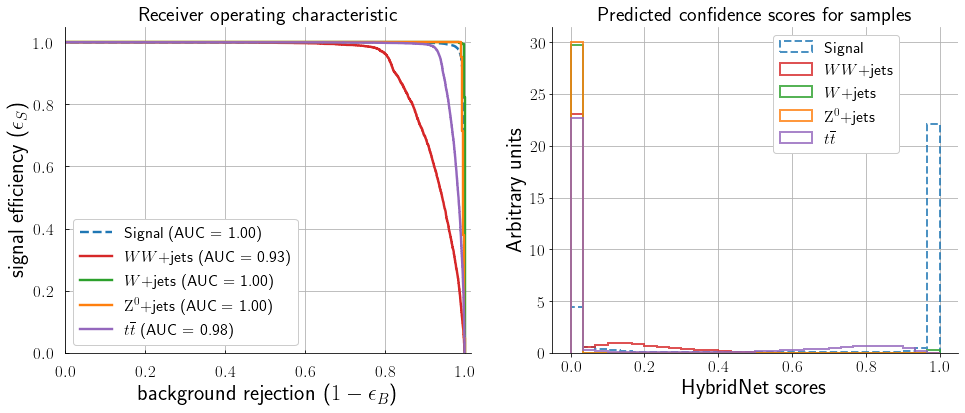

In [164]:
compare_train_test(preds_t,ground_truth)

In [165]:
from asimovErrors import *

In [166]:
tta = np.array([np.argmax(i) for i in ground_truth])

In [167]:
np.where(tta == 0)[0]

array([    1,     2,     3, ..., 54115, 54116, 54117])

In [168]:
from matplotlib.offsetbox import AnchoredText

In [169]:
def ExpectedSignificance(s, b, deltaB):
    sig = sqrt(2*( (s+b)*log( ((s+b)*(b+deltaB*deltaB)) / (b*b+(s+b)*deltaB*deltaB) ) \
                  -( b*b/deltaB/deltaB)*log(1.+ (s*deltaB*deltaB)/(b*(b+deltaB*deltaB)) ) 
                 )
              ) 
    return sig

In [170]:
def hep_asimov_sig(expectedSignal, expectedBackground, predictions,
                   truth, systematics=[0.0001], lumi=None):
    
    
    import matplotlib as mpl
    mpl.rcParams['text.usetex']=True 
    mpl.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
    plt.rcParams.update({'font.size': 28})
    mpl.rcParams["legend.framealpha"] = 1.0
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams["figure.figsize"] = [9.5, 5.5]


    s_index = 0
    bg_index = [1,2,3,4]
    
    decisions = defaultdict(list)
    
    for pred in predictions:
        decisions['s'].append(pred[s_index])
        for bg_i in bg_index:
            decisions[bg_i].append(pred[bg_i])
        
    signalSizeTest = len(decisions['s'])
    signalWeightTest = float(expectedSignal)/signalSizeTest

    
    bg_total = np.stack([decisions[i] for i in bg_index],axis=-1)
    
    bkgdSizeTest = len(bg_total)
    bkgdWeightTest = defaultdict()
    for i in range(len(expectedBkgd)):
        bkgdWeightTest[i] = float(expectedBkgd[i])/bkgdSizeTest
        

    wgt_loc = np.array([i for i in truth])
    weights_sig = np.zeros(len(wgt_loc))
    weights_sig[np.where(wgt_loc == s_index)[0]] = signalWeightTest

    weights_bg = np.zeros(bg_total.shape)
    for i in range(len(expectedBkgd)):
        weights_bg[np.where(wgt_loc == bg_index[i])[0],i] = bkgdWeightTest[i]
    

    ########################
    proc_label = {'signal':'Signal',
                  'bg1':'$WW+$jets',
                  'bg2':'$W+$jets',
                  'bg3':'$\\mathrm{Z^0}+$jets',
                  'bg4':'$t\\overline{t}$'
                  }

    classes = ['signal','bg1','bg2','bg3','bg4']
    
    fig, ax = plt.subplots(figsize=[9,6])
    
    colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    h1 = ax.hist([bg_total[:,i] for i in range(len(bg_index))], 
                 weights=[weights_bg[:,i] for i in range(len(expectedBkgd))], 
                bins=5000, color=[colors[i] for i in range(len(expectedBkgd))], histtype='step',
                alpha=.8, label=[proc_label[classes[i]] for i in bg_index],
                cumulative=-1)
    
    h2 = ax.hist(decisions['s'], weights=weights_sig, 
                bins=5000, color='r', histtype='stepfilled',
                alpha=.2, label=proc_label['signal'],
                cumulative=-1)    
    
    ax.set_yscale('log')
    ax.set_xlabel("Classifier output")
    ax.set_ylabel("Cumulative event counts / 0.02")
    ax.legend(loc='best')


    pth_save = os.path.join('./','significance plots')
    if not os.path.exists(pth_save):
        os.makedirs(pth_save)

    plt.tight_layout()
    plt.savefig(os.path.join(pth_save,'CWD.pdf'))
    plt.clf()

    
    s=h2[0]
    b=np.sum(h1[0],axis=0)

    fig, ax = plt.subplots(figsize=[9,6])
    
    ax.plot((h1[1][:-1]+h1[1][1:])/2,s/b)
    ax.set_title('sig/bkgd on test set')
    at = AnchoredText("{} cross section (fb): {:.2E}\n".format(proc_label['signal'],expectedSignal/lumi) +\
                      "Luminosity: {}\n".format(lumi) +\
                      "best sig/bkgd is {:.6f}".format(max(s/b)),
                      loc='upper left', prop=dict(size=25), frameon=True,
                      )
    
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    ax.set_yscale('log')
    plt.tight_layout()
    plt.savefig(os.path.join(pth_save,'sigDivBkgdDiscriminator.pdf'))
    plt.clf()

    fig, ax = plt.subplots()
    ax.plot((h1[1][:-1]+h1[1][1:])/2,s/(np.sqrt(s+b)))
    at = AnchoredText("Cross section (fb): {:.2f}\n".format(expectedSignal/lumi) +\
                      "Luminosity: {}\n".format(lumi) +\
                      "Best significance is {:.2f}".format(max(s/np.sqrt(s+b))),
                      loc='upper left', prop=dict(size=25), frameon=True,
                      )
    
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    
    
    ax.set_yscale('log')
    ax.grid()
    ax.set_xlabel('Cut on classifier score')
    ax.set_ylabel('$s/\\sqrt{s+b}$')
    plt.tight_layout()
    plt.savefig(os.path.join(pth_save,'sig_sqrt_bkgd.pdf'))
    plt.clf()
    
    sindex = (h1[1][:-1]+h1[1][1:])/2
    mtt = np.argmax(s/(np.sqrt(s+b)))
    print(s[mtt],b[mtt],sindex[mtt])
    
    for systematic in systematics:
        
        fig, ax = plt.subplots(figsize=[9,6])
        toPlot = Z(s,b,systematic)
        ax.plot((h1[1][:-1]+h1[1][1:])/2,toPlot)
        es = signalWeightTest*np.sqrt(s/signalWeightTest)
        ebl = []
        for i in range(len(expectedBkgd)):
            ebl.append(bkgdWeightTest[i])
        ebm = np.mean(ebl)
        eb = ebm*np.sqrt(b/ebm)
        #error=eZ(s,es,b,eb,systematic)
        #-error
        #+error
        ax.fill_between((h1[1][:-1]+h1[1][1:])/2,toPlot,toPlot,linewidth=0,alpha=0.6)

        edindex = (h1[1][:-1]+h1[1][1:])/2
        
        #get the max value without nan
        toPlot = np.array(toPlot)
        toPlot = toPlot[np.logical_not(np.isnan(toPlot))]
        maxIndex=np.argmax(toPlot)
        
        #,error[maxIndex]
        at = AnchoredText("Cross section (fb): {:.4f}\n".format(expectedSignal/lumi) +\
                          "Luminosity: {}\n".format(lumi) +\
                          "best significance is {:.4f}".format(toPlot[maxIndex]),
                          loc='upper left', prop=dict(size=25), frameon=True,
                      )
       
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)

        ax.set_xlabel('Cut on classifier score')
        ax.set_ylabel('$\\mathcal{Z}_A$')
        ax.ticklabel_format(useOffset=False)
        ax.grid()
        plt.tight_layout()
        plt.savefig(os.path.join(pth_save,'Z_{}_sys'.format('resnet50')\
                                 +str(systematic).replace('.','p')\
                                 + '.pdf'))
        plt.clf()
        
    sindex1 = (h1[1][:-1]+h1[1][1:])/2
    mtt1 = np.argmax(toPlot)

    ############
    fig, ax = plt.subplots()
    
    es = signalWeightTest*np.sqrt(s/signalWeightTest)
    ebl = []
    for i in range(len(expectedBkgd)):
        ebl.append(bkgdWeightTest[i])
    ebm = np.mean(ebl)
    eb = ebm*np.sqrt(b/ebm)
    error=eZ(s,es,b,eb,0.0033)
    tf = ExpectedSignificance(s,b,error)
    tf = tf[~np.isnan(tf)]
    #tf = s/(np.sqrt(b) + 1)
    #tf[~np.isinf(tf)]
    maxIndex=np.argmax(tf)
    #ax.plot((h1[1][:-1]+h1[1][1:])/2,s/(np.sqrt(b)))
    #ax.fill_between((h1[1][:-1]+h1[1][1:])/2,s/(np.sqrt(b))-error,s/(np.sqrt(b))+error,linewidth=0,alpha=0.6)
    ax.plot((h1[1][:-1]+h1[1][1:])/2,ExpectedSignificance(s,b,error))
    #-error
    #+error
    ax.fill_between((h1[1][:-1]+h1[1][1:])/2,ExpectedSignificance(s,b,error),ExpectedSignificance(s,b,error),linewidth=0,alpha=0.6)
    #error[maxIndex+3]
    at = AnchoredText("Cross section (fb): {:.4f}\n".format(expectedSignal/lumi) +\
                      "Luminosity: {}\n".format(lumi) +\
                      #"best sig/sqrt(bkgd) is {:.2f} $\\pm$ {:.3f}".format(s[maxIndex]/(np.sqrt(b[maxIndex])),error[maxIndex]),
                      "Best significance is {:.4f}".format(tf[maxIndex]),
                      loc='upper center', prop=dict(size=24), frameon=True,
                      bbox_to_anchor=(440., 380.)
                      )

    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    ax.set_xlabel('Cut on classifier score')
    ax.set_ylabel('$\\mathcal{Z}(1\%)$')
    ax.ticklabel_format(useOffset=False)
    ax.ticklabel_format()
    ax.grid()
    plt.tight_layout()
    #ax.set_title('sig/sqrt(bkgd)')
    plt.savefig(os.path.join(pth_save,'Z_1perc.pdf'))
    plt.clf()
    
    sindex2 = (h1[1][:-1]+h1[1][1:])/2
    mtt2 = np.argmax(ExpectedSignificance(s,b,error))
    

In [171]:
x_sec_signal = 2.2574733795310775e-06*1000
x_sec_Diboson = 7.720473226175799*1000
x_sec_W_plus_jets = 345.54038414669117*1000
x_sec_Z_plus_jets = 5.700842231284646*1000
x_sec_ttbar = 183.2741596582192*1000

lumi=3000. #luminosity in /fb
expectedSignal= x_sec_signal*lumi
expectedBkgd=[i*lumi for i in [x_sec_Diboson, x_sec_W_plus_jets, x_sec_Z_plus_jets, x_sec_ttbar]]
systematic=[0.0033,0.01,0.1,0.15, 0.25, 0.5] #systematic for the asimov signficance

In [172]:
hep_asimov_sig(expectedSignal, expectedBkgd, preds_t,
               ground_truth, systematics=systematic, lumi=lumi)

/tmp/ipykernel_108635/4092162464.py:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
/tmp/ipykernel_108635/4092162464.py:91: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((h1[1][:-1]+h1[1][1:])/2,s/b)
/tmp/ipykernel_108635/4092162464.py:95: RuntimeWarning: divide by zero encountered in true_divide
  "best sig/bkgd is {:.6f}".format(max(s/b)),


5.272971930961469 0.0 0.5754195


/home/felipe/JoaoPino/vlq_joao_StrongProduction/asimovErrors.py:10: RuntimeWarning: invalid value encountered in true_divide
  return sqrt( -2.0/(sig*sig)*log( b/( b+(b*b)*(sig*sig))*(sig*sig)*s+1.0)+ \
/home/felipe/JoaoPino/vlq_joao_StrongProduction/asimovErrors.py:11: RuntimeWarning: invalid value encountered in true_divide
  2.0*( b+s)*log(( b+s)*( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig))))
/home/felipe/JoaoPino/vlq_joao_StrongProduction/asimovErrors.py:10: RuntimeWarning: invalid value encountered in true_divide
  return sqrt( -2.0/(sig*sig)*log( b/( b+(b*b)*(sig*sig))*(sig*sig)*s+1.0)+ \
/home/felipe/JoaoPino/vlq_joao_StrongProduction/asimovErrors.py:11: RuntimeWarning: invalid value encountered in true_divide
  2.0*( b+s)*log(( b+s)*( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig))))
/home/felipe/JoaoPino/vlq_joao_StrongProduction/asimovErrors.py:10: RuntimeWarning: invalid value encountered in sqrt
  return sqrt( -2.0/(sig*sig)*log( b/( b+(b*b)*(sig*sig))*(sig*sig)*

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 684x396 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 684x396 with 0 Axes>

In [ ]:
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
plt.rcParams.update({'font.size': 17})
mpl.rcParams["legend.framealpha"] = 1.0
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["figure.figsize"] = [11.5, 5.5]

Luminosity = np.array([10,100,300,500,1000,3000])

Sigma_Asimov_15perc = [4.18, 10.53, 13.76, 14.90, 15.99, 16.89]
Sigma_Asimov_25perc = [3.95, 8.14, 9.45, 9.81, 10.11, 10.33]
Sigma_Asimov_50erc = [3.26, 4.83, 5.08, 5.14, 5.18, 5.21]

Array = np.append(np.append(Sigma_Asimov_15perc,Sigma_Asimov_25perc),Sigma_Asimov_50erc)
Arg_max = np.max(Array)

#Run-III
N=50
L_run3 = 300*np.ones(N)
L_run4 = 3000*np.ones(N)


f3 = interpolate.interp1d(Luminosity, Sigma_Asimov_15perc, kind='cubic')
f2 = interpolate.interp1d(Luminosity, Sigma_Asimov_25perc, kind='cubic')
f1 = interpolate.interp1d(Luminosity, Sigma_Asimov_50erc, kind='cubic')

#plt.title('VLQ pair-production: $\\mathrm{m_T} = 2.2$ TeV, significance with systematics of 1$\%$',pad=20)
plt.title('Significance vs Luminosity $\\mathrm{m_{VLQ}} = 800$ GeV',pad=20)
plt.xlabel('Luminosity fb$^{-1}$',fontsize=22)
plt.ylabel('Significance',fontsize=22)
plt.tight_layout()
plt.plot(Luminosity,f1(Luminosity),'g',label='$\mathcal{Z}_A(\sigma_b = 50\%)$')
plt.plot(Luminosity,f2(Luminosity),'r',label='$\mathcal{Z}_A(\sigma_b = 25\%)$')
plt.plot(Luminosity,f3(Luminosity),'b',label='$\mathcal{Z}_A(\sigma_b = 15\%)$')
plt.text(235,0.03*np.max(Arg_max),'300 fb$^{-1}$',rotation=90,fontsize=20)
plt.text(3400,0.1*np.max(Arg_max),'3000 fb$^{-1}$',rotation=90,fontsize=20)
plt.plot(L_run3,np.linspace(0,np.max(Arg_max),N),'--k')
plt.plot(L_run4,np.linspace(0,np.max(Arg_max),N),'--k')
plt.plot(Luminosity,Sigma_Asimov_50erc,'og')
plt.plot(Luminosity,Sigma_Asimov_25perc,'or')
plt.plot(Luminosity,Sigma_Asimov_15perc,'ob')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(bbox_to_anchor = [0.25, 1.05], prop={'size': 16})
#plt.legend(bbox_to_anchor = [0.22, 0.70], prop={'size': 16})
#plt.tight_layout()
#plt.show()

#plt.savefig('/home/joao/Desktop/Machine Learning/Plots/significance plots/sig_plot.pdf')
plt.savefig('/home/felipe/JoaoPino/vlq_joao_StrongProduction/significance plots/sig_plot.pdf')
